In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w = np.array([0.15, 0.6])
eta = 0.01

all_weights = []
energy = []

print(f"Initial weights (for gradient descent) are: {w}\nLearning rate is: {eta}")

Initial weights (for gradient descent) are: [0.15 0.6 ]
Learning rate is: 0.01


In [3]:
while (w[0]+w[1]) < 1 and w[0] > 0 and w[1] > 0 :
    f_w = - np.log(1 - w[0] - w[1]) - np.log(w[0]) - np.log(w[1])
    energy.append(f_w)
    
    all_weights.append(w)
    
    grad = np.array([(1 / (1-w[0]-w[1])) - (1 / w[0]), (1 / (1-w[0]-w[1])) - (1 / w[1])])
    
    delta_w = eta * grad
    new_w = w - delta_w
    
    if np.linalg.norm(w - new_w) < 0.001:
        break
    else:
        w = new_w

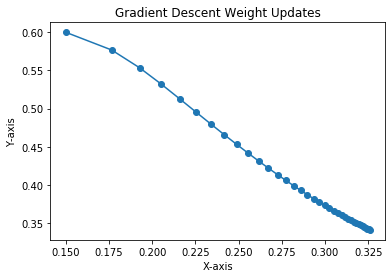

In [4]:
all_weights = np.array(all_weights)

plt.plot(all_weights[:, 0], all_weights[:, 1], '-o')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Gradient Descent Weight Updates")
plt.show()

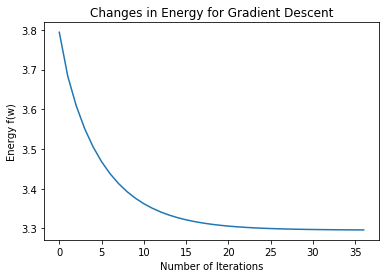

In [5]:
plt.plot(range(len(energy)), energy)
plt.xlabel("Number of Iterations")
plt.ylabel("Energy f(w)")
plt.title("Changes in Energy for Gradient Descent")
plt.show()

In [6]:
w = np.array([0.15, 0.6])
eta = 0.01

print(f"Initial weights (for Newton's method) are: {w}\nLearning rate is: {eta}")

all_weights = []
energy = []

H = np.empty((2, 2))

Initial weights (for Newton's method) are: [0.15 0.6 ]
Learning rate is: 0.01


In [7]:
while (w[0]+w[1]) < 1 and w[0] > 0 and w[1] > 0 :
    f_w = - np.log(1 - w[0] - w[1]) - np.log(w[0]) - np.log(w[1])
    energy.append(f_w)
    
    all_weights.append(w)
    
    grad = np.array([(1 / (1-w[0]-w[1])) - (1 / w[0]), (1 / (1-w[0]-w[1])) - (1 / w[1])])
    
    H[0,:] = [(1 / (1-w[0]-w[1])**2) + (1 / w[0]**2),
              (1 / (1-w[0]-w[1])**2)]
    H[1,:] = [(1 / (1-w[0]-w[1])**2),
              (1 / (1-w[0]-w[1])**2) + (1 / w[1]**2)]
    
    delta_w = eta * np.matmul(np.linalg.inv(H), grad)
    new_w = w - delta_w
    
    if np.linalg.norm(w - new_w) < 0.001:
        break
    else:
        w = new_w

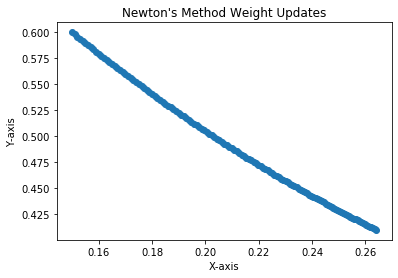

In [8]:
all_weights = np.array(all_weights)
plt.plot(all_weights[:, 0], all_weights[:, 1], '-o')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Newton's Method Weight Updates")
plt.show()

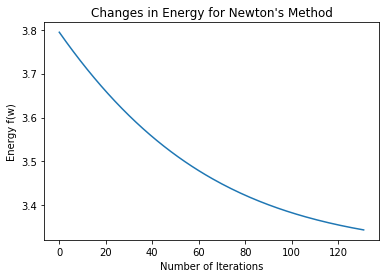

In [9]:
plt.plot(range(len(energy)), energy)
plt.xlabel("Number of Iterations")
plt.ylabel("Energy f(w)")
plt.title("Changes in Energy for Newton's Method")
plt.show()

## Comparing the speed of convergence of gradient descent and Newton’s method:
#### For the weights chosen, we can see that the Newton's method requires more iterations to converge as compared to the gradient descent method. 
#### But, we can find certain weights, and learning rate that makes the Newton's method converge faster. It may be because in general the Newton's method converges faster.
#### Hence, we cannot generalize as such and certain initial weights, and learning rate may benefit the gradient descent, while certain learning rate may be optimal for the Newton's approach.